In [1]:
# import essential libraries
import pandas as pd
import numpy as np
import pickle
import scipy
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, LogisticRegressionCV, SGDClassifier, RidgeClassifier
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error, f1_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import svm, linear_model
from sklearn import tree, metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import gzip

In [2]:
df = pd.read_csv('training_13_features.csv')
new_df = df.dropna()
# new_df = new_df[new_df['ritmi'] != 2]
new_df = new_df.reset_index(drop=True)
df.head()

,ritmi,age,sex,height,weight,nurse,site,device,heart_axis,validated_by,second_opinion,validated_by_human,pacemaker,strat_fold
0,2,54.0,0,166.796356,69.841845,0.0,0.0,0,3.0,0.0,0,0,0.0,6
1,1,54.0,0,166.796356,69.841845,0.0,0.0,0,3.0,0.0,0,0,0.0,6
2,0,55.0,0,166.796356,69.841845,1.0,2.0,1,1.0,1.0,0,1,0.0,10
3,2,29.0,1,164.000000,56.000000,7.0,1.0,10,0.0,0.0,0,1,0.0,1
4,2,57.0,0,166.796356,69.841845,0.0,0.0,0,3.0,0.0,0,0,0.0,1


In [3]:
# convert all columns' types to float64
for i in range(14):
    new_df[new_df.columns[i]] = new_df[new_df.columns[i]].astype('float64')
    
# get info for columns
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ritmi               6366 non-null   float64
 1   age                 6366 non-null   float64
 2   sex                 6366 non-null   float64
 3   height              6366 non-null   float64
 4   weight              6366 non-null   float64
 5   nurse               6366 non-null   float64
 6   site                6366 non-null   float64
 7   device              6366 non-null   float64
 8   heart_axis          6366 non-null   float64
 9   validated_by        6366 non-null   float64
 10  second_opinion      6366 non-null   float64
 11  validated_by_human  6366 non-null   float64
 12  pacemaker           6366 non-null   float64
 13  strat_fold          6366 non-null   float64
dtypes: float64(14)
memory usage: 696.4 KB


In [4]:
new_df.head()

,ritmi,age,sex,height,weight,nurse,site,device,heart_axis,validated_by,second_opinion,validated_by_human,pacemaker,strat_fold
0,2.0,54.0,0.0,166.796356,69.841845,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,6.0
1,1.0,54.0,0.0,166.796356,69.841845,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,6.0
2,0.0,55.0,0.0,166.796356,69.841845,1.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0
3,2.0,29.0,1.0,164.000000,56.000000,7.0,1.0,10.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2.0,57.0,0.0,166.796356,69.841845,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0


In [5]:
# train-test split
X = df.drop(columns = ['ritmi','pacemaker', 'validated_by_human', 'device', 'nurse', 'validated_by', 'strat_fold', 'second_opinion', 'site', 'heart_axis'])#[['I','II','III','aVF','aVR','aVL','V1','V2','V3','V4','V5','V6','age','sex','height','weight']]
y = df['ritmi']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.25, random_state = 1234)

In [6]:
# Plug in appropriate max_depth and random_state parameters
rf = RandomForestClassifier()
rf_param_grid = {'n_estimators': [600], 'criterion': ['entropy'], 'max_depth': [60]} #0.502161524857536
rf_cv= GridSearchCV(rf,rf_param_grid,cv=7,n_jobs=-1)
rf_cv.fit(X_train,y_train)

print("Best Score:" + str(rf_cv.best_score_))
print("Best Parameters: " + str(rf_cv.best_params_))

Best Score:0.44555008944543834
Best Parameters: {'criterion': 'entropy', 'max_depth': 60, 'n_estimators': 600}


In [7]:
y_pred = rf_cv.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.28      0.34       512
           1       0.42      0.33      0.37       386
           2       0.46      0.64      0.53       709

    accuracy                           0.45      1607
   macro avg       0.44      0.41      0.41      1607
weighted avg       0.45      0.45      0.43      1607



In [8]:
y_train_pred = rf_cv.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.54      0.67      1488
           1       0.70      0.53      0.60      1201
           2       0.63      0.87      0.73      2132

    accuracy                           0.69      4821
   macro avg       0.73      0.65      0.67      4821
weighted avg       0.72      0.69      0.68      4821



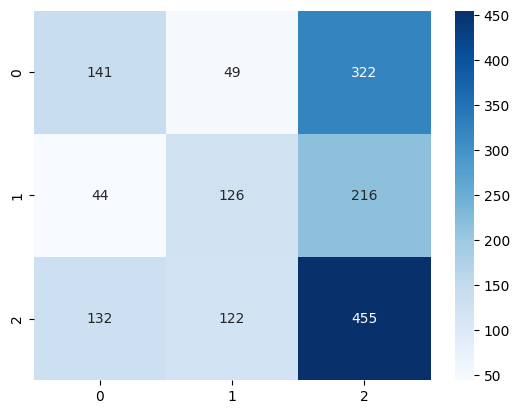

In [9]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

# K-Neighbors

In [10]:
clfl2 = KNeighborsClassifier()
parameters = {'n_neighbors': [140], 'weights': ['distance'], 'metric': ['euclidean']} #0.4830258302583026

fitmodel = GridSearchCV(clfl2, param_grid=parameters, cv=5, refit=True, scoring="accuracy", n_jobs=-1, verbose=2)
fitmodel.fit(X_train, y_train)
print(fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END metric=euclidean, n_neighbors=140, weights=distance; total time=   0.1s
[CV] END metric=euclidean, n_neighbors=140, weights=distance; total time=   0.1s
[CV] END metric=euclidean, n_neighbors=140, weights=distance; total time=   0.2s
[CV] END metric=euclidean, n_neighbors=140, weights=distance; total time=   0.3s
[CV] END metric=euclidean, n_neighbors=140, weights=distance; total time=   0.1s
KNeighborsClassifier(metric='euclidean', n_neighbors=140, weights='distance') {'metric': 'euclidean', 'n_neighbors': 140, 'weights': 'distance'} 0.4469982585513728


In [11]:
y_pred = fitmodel.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.25      0.32       512
           1       0.43      0.33      0.37       386
           2       0.46      0.66      0.54       709

    accuracy                           0.45      1607
   macro avg       0.44      0.41      0.41      1607
weighted avg       0.45      0.45      0.43      1607



In [13]:
y_train_pred = fitmodel.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.57      0.68      1488
           1       0.69      0.54      0.61      1201
           2       0.63      0.85      0.72      2132

    accuracy                           0.69      4821
   macro avg       0.72      0.65      0.67      4821
weighted avg       0.71      0.69      0.68      4821



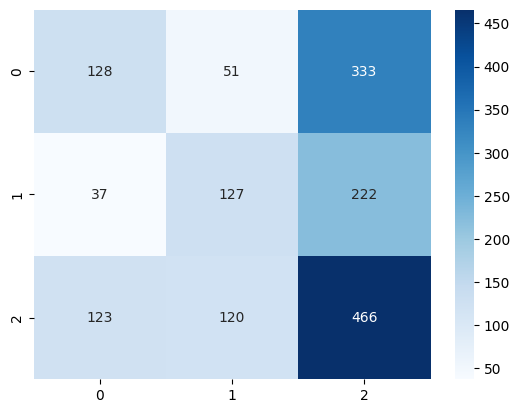

In [14]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

## Deep learning models

In [15]:
#CNN
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout,MaxPooling1D,LSTM
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical

In [16]:
#Reshape train and test data to (n_samples, 187, 1), where each sample is of size (187, 1)
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [17]:
y_test_old = y_test.copy()

In [18]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
y_train.shape[1]

3

## 1-D Convolution

In [20]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# fit network
history_1d = model.fit(X_train, y_train, epochs=20)
# evaluate model

Epoch 1/20
151/151 [==============================] - 1s 5ms/step - loss: 1.2476 - accuracy: 0.3790
Epoch 2/20
151/151 [==============================] - 1s 5ms/step - loss: 1.1451 - accuracy: 0.3922
Epoch 3/20
151/151 [==============================] - 0s 2ms/step - loss: 1.0939 - accuracy: 0.4086
Epoch 4/20
151/151 [==============================] - 0s 2ms/step - loss: 1.0689 - accuracy: 0.4059
Epoch 5/20
151/151 [==============================] - 0s 2ms/step - loss: 1.0605 - accuracy: 0.4057
Epoch 6/20
151/151 [==============================] - 0s 2ms/step - loss: 1.0413 - accuracy: 0.4254
Epoch 7/20
151/151 [==============================] - 0s 2ms/step - loss: 1.0390 - accuracy: 0.4256
Epoch 8/20
151/151 [==============================] - 0s 2ms/step - loss: 1.0325 - accuracy: 0.4292
Epoch 9/20
151/151 [==============================] - 0s 2ms/step - loss: 1.0359 - accuracy: 0.4256
Epoch 10/20
151/151 [==============================] - 0s 3ms/step - loss: 1.0321 - accuracy: 0.4271

In [26]:
_, accuracy = model.evaluate(X_test, y_test)

51/51 [==============================] - 0s 1ms/step - loss: 1.0295 - accuracy: 0.4418


In [27]:
pred_result = model.predict(X_test)
final_pred = [np.argmax(i) for i in pred_result]
print(classification_report(y_test_old,final_pred))

51/51 [==============================] - 0s 863us/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       512
           1       0.44      0.02      0.04       386
           2       0.44      0.99      0.61       709

    accuracy                           0.44      1607
   macro avg       0.30      0.34      0.22      1607
weighted avg       0.30      0.44      0.28      1607



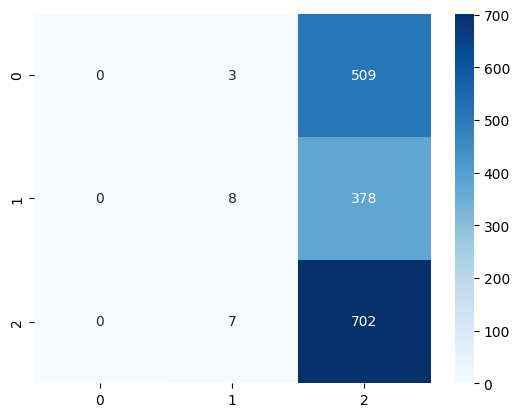

In [28]:
# confusion matrix

cm = confusion_matrix(y_test_old, final_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

## LSTM models

In [29]:
lstm_model = Sequential()
lstm_model.add(LSTM(100, input_shape=(X_train.shape[1],1)))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(100, activation="relu"))
lstm_model.add(Dense(y_train.shape[1], activation="softmax"))
lstm_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                                 
Total params: 51,203
Trainable params: 51,203
Non-trainable params: 0
_________________________________________________________________


In [30]:
# fit network
history_lstm = lstm_model.fit(X_train, y_train, epochs=1)
# evaluate model

151/151 [==============================] - 5s 6ms/step - loss: 1.0871 - accuracy: 0.4105


In [31]:
_, accuracy = lstm_model.evaluate(X_test, y_test)

51/51 [==============================] - 1s 3ms/step - loss: 1.0341 - accuracy: 0.4412


In [32]:
lstm_pred_result = lstm_model.predict(X_test)

51/51 [==============================] - 2s 9ms/step


In [33]:
final_pred_lstm = [np.argmax(i) for i in lstm_pred_result]

In [34]:
print(classification_report(y_test_old,final_pred_lstm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       512
           1       0.00      0.00      0.00       386
           2       0.44      1.00      0.61       709

    accuracy                           0.44      1607
   macro avg       0.15      0.33      0.20      1607
weighted avg       0.19      0.44      0.27      1607



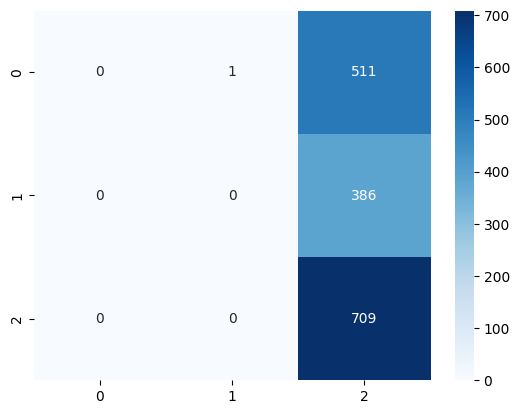

In [35]:
# confusion matrix

cm = confusion_matrix(y_test_old, final_pred_lstm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()
